In [1]:
from segmentandoDatasets import segmentando_datasets
segmentando_datasets(10000,10000,10000)

DataFrame do local PUC salvo como: Datasets_csv/df_PUC.csv
DataFrame do local PUC:
                                      caminho_imagem    classe
0  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
1  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
2  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
3  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
4  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty


DataFrame do local UFPR04 salvo como: Datasets_csv/df_UFPR04.csv
DataFrame do local UFPR04:
                                      caminho_imagem    classe
0  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
1  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
2  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
3  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty
4  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty


DataFrame do local UFPR05 salvo como: Datasets_csv/df_UFPR05.csv


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint



2024-09-04 15:27:23.166123: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 15:27:23.177344: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 15:27:23.180583: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-04 15:27:23.189574: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-04 15:27:24.100867: W tensorflow/compiler/tf2

In [3]:
from preprocessamento import *

csv_file = 'Datasets_csv/df_PUC.csv'
train, teste, val, _, _, _ = preprocessamento(csv_file, 0.6, 0.2, 0.2, True)

Found 6000 validated image filenames.
Found 2000 validated image filenames.
Found 2000 validated image filenames.


In [23]:
train.dtype

'float32'

TypeError: Invalid shape (32, 256, 256, 3) for image data

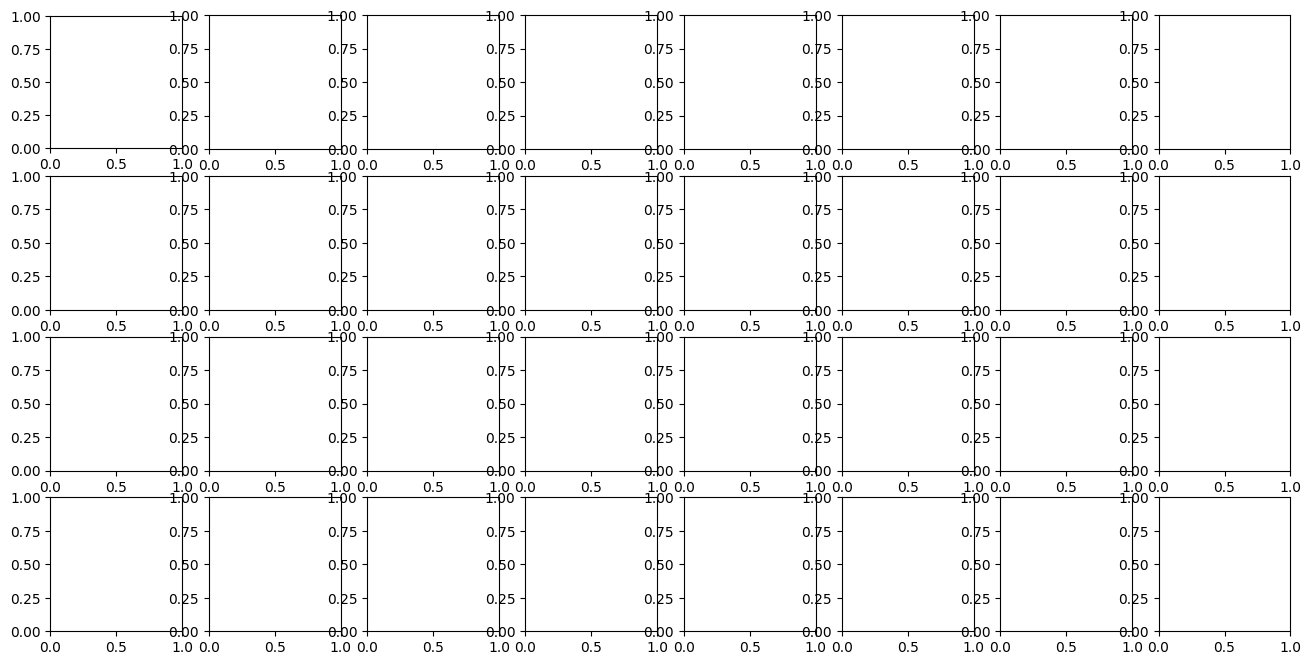

In [22]:
import matplotlib.pyplot as plt

# Exibir as primeiras 9 imagens do batch
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
axes = axes.flatten()

for i in range(32):
    img = train[i]
    axes[i].imshow(img)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [5]:
input_image = layers.Input(shape=(256,256,3))
x = layers.Conv2D(16, (3, 3),strides=(2,2),activation="relu", padding="same")(input_image)#128
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3),strides=(2,2), activation="relu", padding="same")(x)#64
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3, 3),strides=(2,2), activation="relu", padding="same")(x)#32
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3, 3),strides=(2,2), activation="relu", padding="same")(x)#16
x = layers.BatchNormalization()(x)
x = layers.Conv2D(256, (3, 3),strides=(2,2), activation="relu", padding="same")(x)#8
x = layers.BatchNormalization()(x)
x = layers.Conv2D(512, (3, 3),strides=(2,2), activation="relu", padding="same")(x)#4
encoder_output = layers.BatchNormalization()(x)
 
latent_shape = (4,4,512)
    
#decoder
decoder_input = layers.Input(shape=latent_shape)
x = layers.Conv2DTranspose(512, (3, 3),strides=(2,2), activation="relu", padding="same")(decoder_input)
x = layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(256, (3, 3), strides=2,activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(16, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
decoder_output = layers.Conv2DTranspose(3, (3, 3), padding="same", activation="sigmoid")(x)

#autoencoder
encoder = Model(input_image, encoder_output)
decoder = Model(decoder_input,decoder_output)
autoencoder = Model(input_image, decoder(encoder_output))
autoencoder.compile(optimizer="Adam", loss="mean_absolute_error") #deafult lr = 0.001
autoencoder.summary()

I0000 00:00:1725474445.155429   26604 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725474445.188936   26604 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725474445.189161   26604 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725474445.190189   26604 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_1 (Functional)       │ (None, 256, 256, 3)    │     3,936,099 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,512,899 (21.03 MB)

 Trainable params: 5,508,867 (21.01 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [6]:
history = autoencoder.fit(
    train,
    epochs=10,
    batch_size=32,
    validation_data=val,
    verbose=2)

Epoch 1/10


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725474454.146538   26733 service.cc:146] XLA service 0x7182fc002b60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725474454.146557   26733 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660, Compute Capability 7.5
2024-09-04 15:27:34.306338: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-04 15:27:34.907784: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-0

188/188 - 60s - 321ms/step - loss: 0.0824 - val_loss: 0.1245
Epoch 2/10
188/188 - 23s - 125ms/step - loss: 0.0546 - val_loss: 0.0834
Epoch 3/10
188/188 - 23s - 122ms/step - loss: 0.0509 - val_loss: 0.0844
Epoch 4/10
188/188 - 23s - 124ms/step - loss: 0.0492 - val_loss: 0.0536
Epoch 5/10
188/188 - 23s - 124ms/step - loss: 0.0472 - val_loss: 0.0591
Epoch 6/10
188/188 - 23s - 125ms/step - loss: 0.0463 - val_loss: 0.0541
Epoch 7/10
188/188 - 23s - 124ms/step - loss: 0.0443 - val_loss: 0.0531
Epoch 8/10
188/188 - 24s - 127ms/step - loss: 0.0447 - val_loss: 0.0479
Epoch 9/10
188/188 - 24s - 127ms/step - loss: 0.0427 - val_loss: 0.0602
Epoch 10/10
188/188 - 23s - 124ms/step - loss: 0.0405 - val_loss: 0.0644


<Axes: >

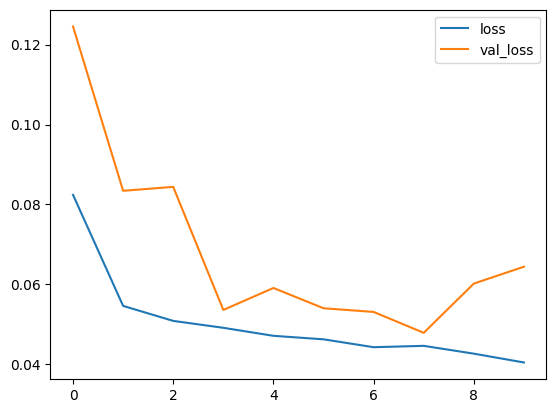

In [7]:
pd.DataFrame(history.history).plot()

In [8]:
# Obtendo um lote de dados
batch = next(teste)
images, labels = batch

# Pega uma imagem do lote
sample_image = images[0:1]  # Pega a primeira imagem do lote

# Testar o encoder
latent_representation = encoder.predict(sample_image)
print("Latent representation shape:", latent_representation.shape)

# Testar o decoder
reconstructed_image = decoder.predict(latent_representation)
print("Reconstructed image shape:", reconstructed_image.shape)

# Testar o autoencoder
reconstructed_image_autoencoder = autoencoder.predict(sample_image)
print("Autoencoder reconstructed image shape:", reconstructed_image_autoencoder.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
Latent representation shape: (1, 4, 4, 512)


2024-09-04 15:31:58.234221: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Reconstructed image shape: (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
Autoencoder reconstructed image shape: (1, 256, 256, 3)


Found 10000 validated image filenames.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━

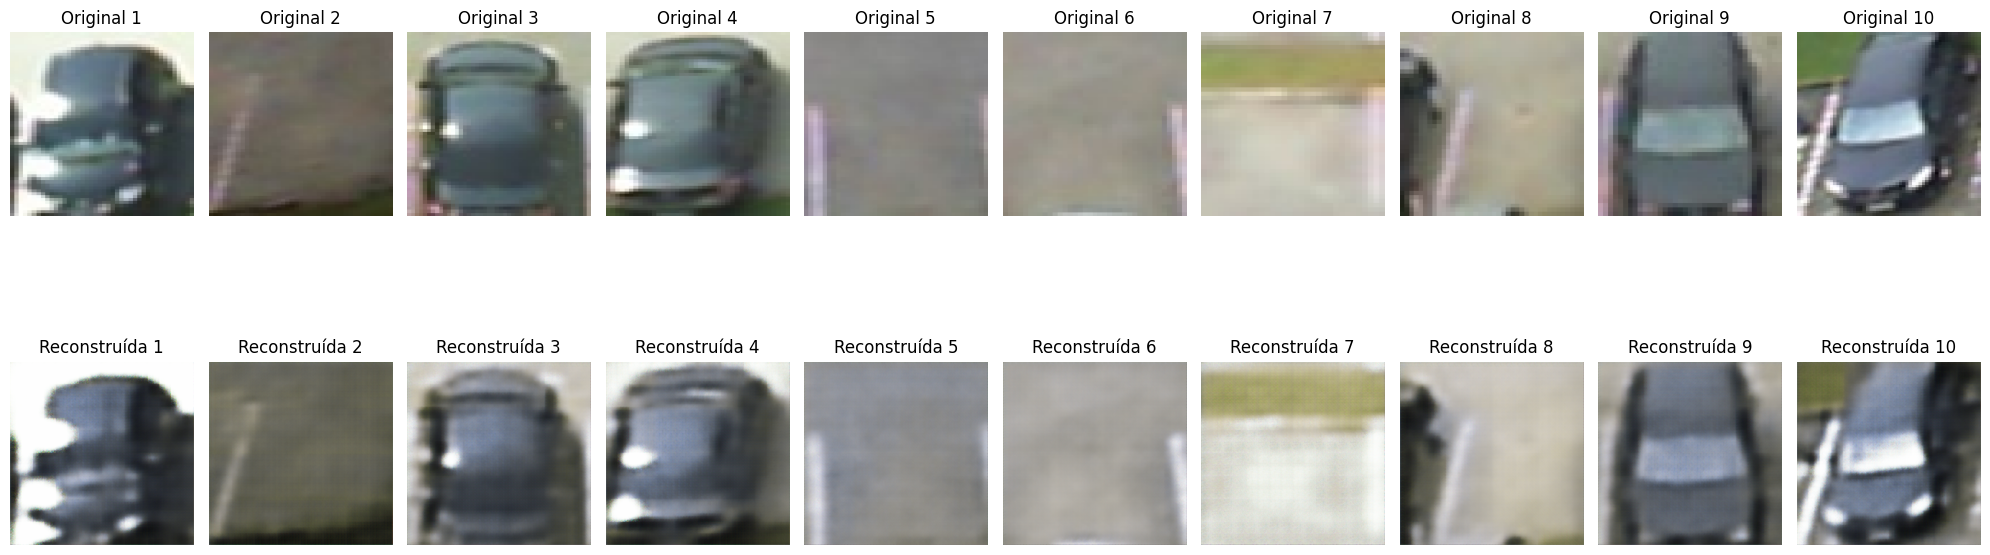

Found 10000 validated image filenames.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━

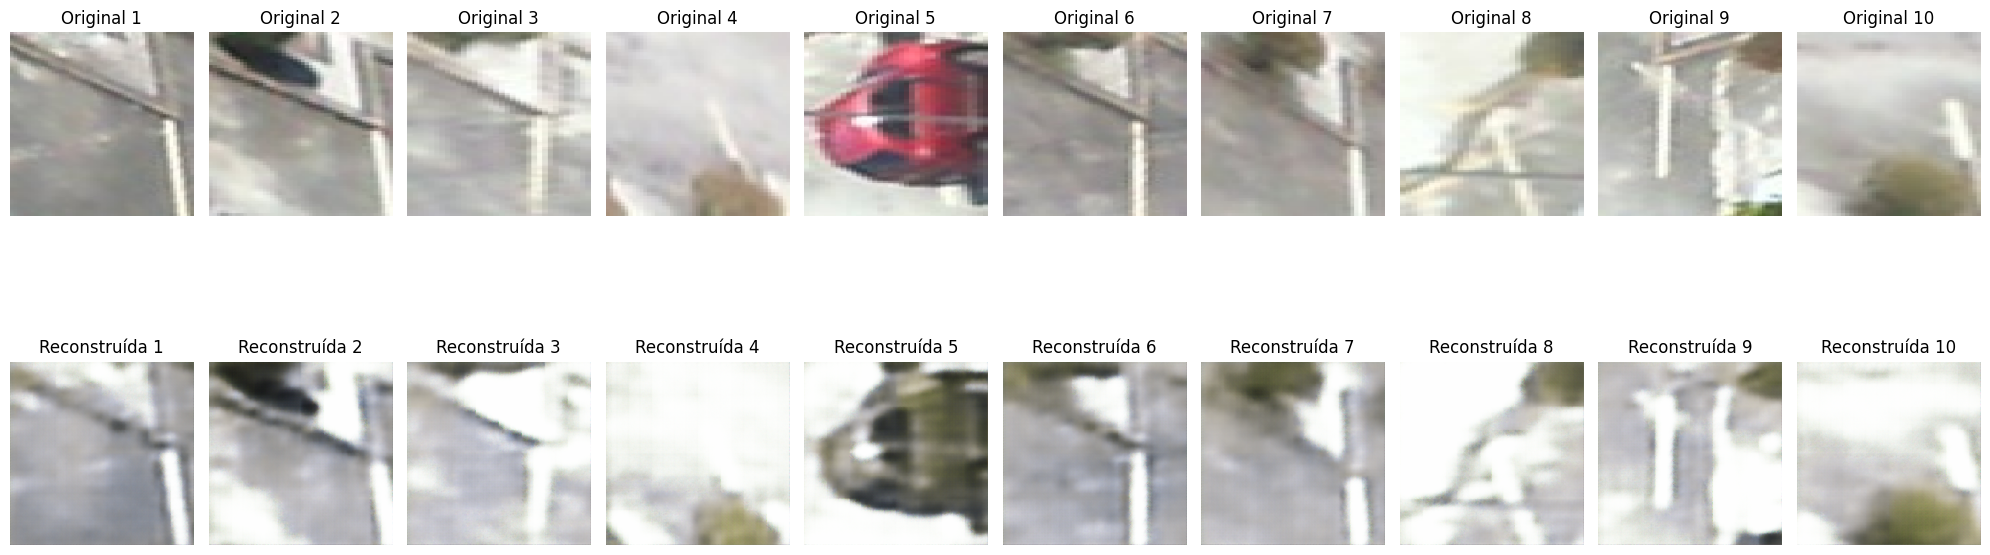

Found 10000 validated image filenames.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━

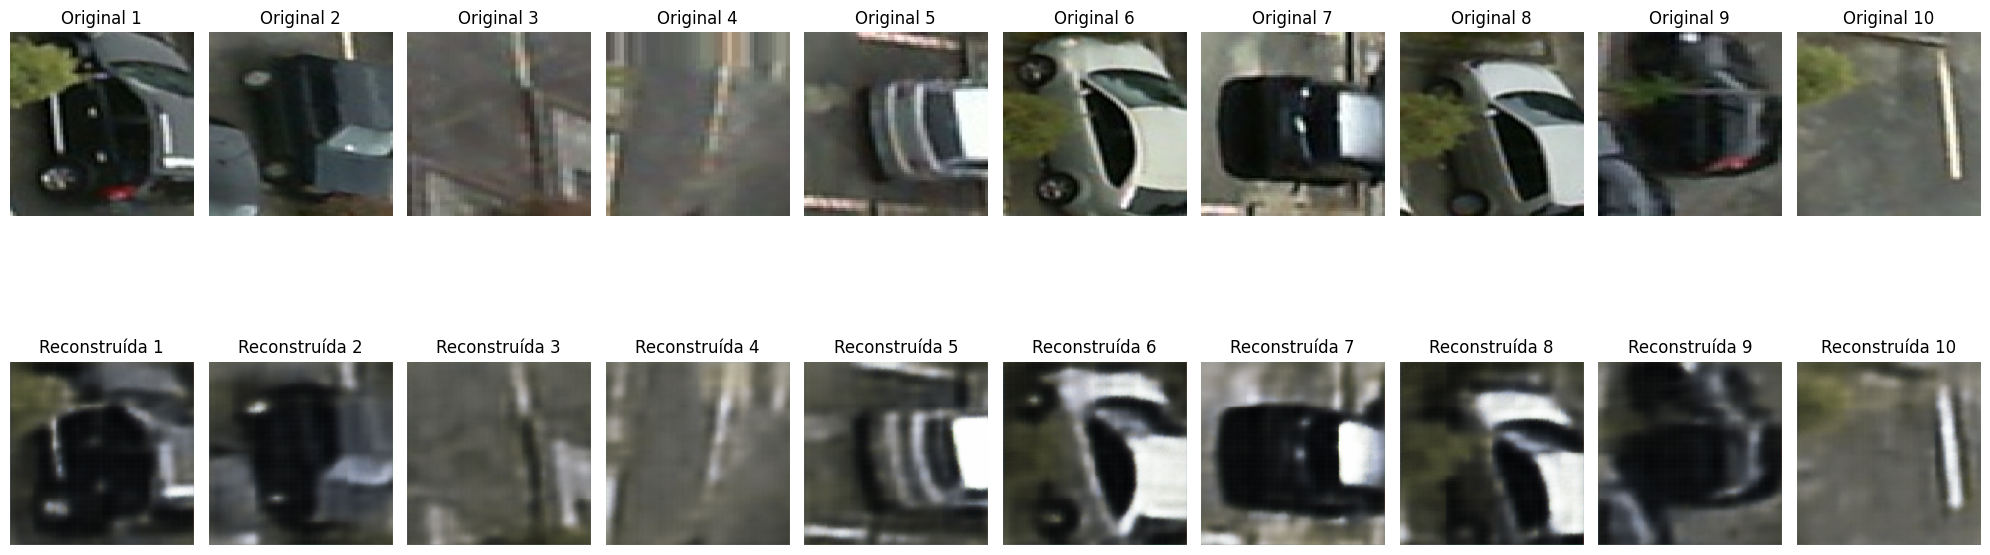

In [20]:
from preprocessamento import preprocessamento_dataframe_unico
import numpy as np
import matplotlib.pyplot as plt

def visualizar_imagens(caminho_csv, encoder, decoder, autoencoder, num_imagens=10):
    dataset, _ = preprocessamento_dataframe_unico(caminho_csv, True)

    batch = next(dataset)
    imagens, _ = batch 

    # Cria uma figura com subplots adequados (2 fileiras e 10 colunas)
    f, axes = plt.subplots(2, num_imagens, figsize=(20, 8))

    for i in range(num_imagens):
        imagem_exemplo = imagens[i:i+1]  

        representacao_latente = encoder.predict(imagem_exemplo)

        imagem_reconstruida = decoder.predict(representacao_latente)

        imagem_reconstruida_autoencoder = autoencoder.predict(imagem_exemplo)

        # Visualizar a imagem original
        axes[0, i].imshow(imagem_exemplo[0])
        axes[0, i].set_title(f"Original {i+1}")
        axes[0, i].axis("off")

        # Visualizar a imagem reconstruída pelo autoencoder
        axes[1, i].imshow(np.reshape(imagem_reconstruida[0], (256, 256, 3)))
        axes[1, i].set_title(f"Reconstruída {i+1}")
        axes[1, i].axis("off")

    plt.tight_layout()
    plt.show()

# Exemplo de uso
visualizar_imagens('/home/lucas/PIBIC (copy)/Datasets_csv/df_PUC.csv', encoder, decoder, autoencoder)
visualizar_imagens('/home/lucas/PIBIC (copy)/Datasets_csv/df_UFPR04.csv', encoder, decoder, autoencoder)
visualizar_imagens('/home/lucas/PIBIC (copy)/Datasets_csv/df_UFPR05.csv', encoder, decoder, autoencoder)
